In [1]:
import gymnasium as gym
import numpy as np
import torch
from psutil import cpu_count
from pydrake.all import StartMeshcat
import Franka_gym_pos
from Franka_gym_pos import *
from manipulation.utils import FindDataResource, RenderDiagram, running_as_notebook

num_cpu = int(cpu_count() / 2) if running_as_notebook else 2

In [ ]:
meshcat = StartMeshcat()

## Teleop Franka arm 
To move the robot manually and visualize it : 
Enter an integer between 0 and 5 as input.

0: positive translation along the x-axis / 1: negative translation <br>

2: positive translation along the y-axis / 3: negative translation <br>

4: positive translation along the z-axis / 5: negative translation 

In [ ]:

env = gym.make("Franka-v1", meshcat=meshcat)
obs, _ = env.reset()
env.render()

for i in range(50):

    action = [int(input("Choose an action "))]
    obs, reward, terminated, truncated, info= env.step(action)
    env.render()
    

### Simulation with random actions

Sample a random action at each time step to make the robot move randomly :

In [ ]:

env = gym.make("Franka-v1", meshcat=meshcat)
obs, _ = env.reset()
meshcat.StartRecording()
for i in range(200 if running_as_notebook else 5):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    #if i == 50 : break
    env.render()
    if terminated: 
        obs, _ = env.reset()
meshcat.PublishRecording()

Note: The Meshcat visualizer allows you to replay the simulation after recording it. To do this, click on Open Control → Animations → Default.

/home/younes/iris/drake/drake_env/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.simulator to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.simulator` for environment variables or `env.get_wrapper_attr('simulator')` that will search the reminding wrappers.
  logger.warn(


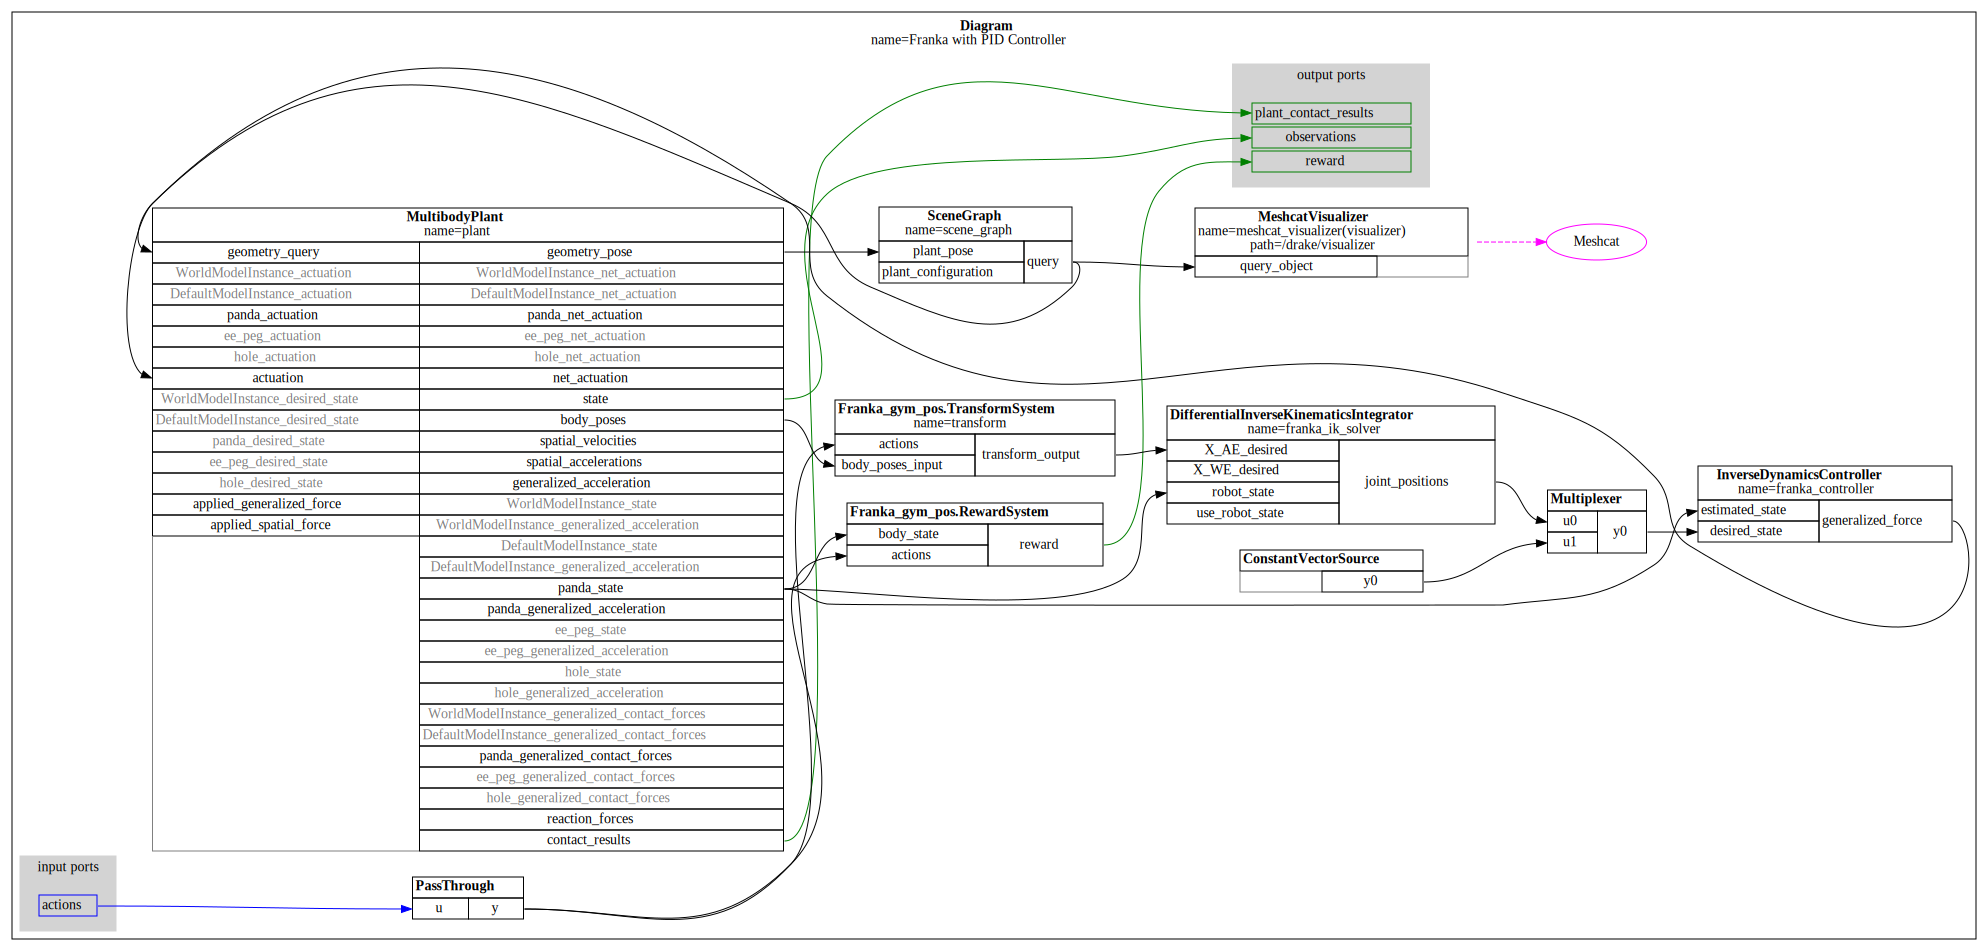

In [7]:
# To display the diagram of our system

simulator= env.simulator
RenderDiagram(simulator.get_system(), max_depth=1)